## Loading Libraries

In [2]:
import pandas as pd
import seaborn as sns
from elo import rate_1vs1
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Loading Match Data

In [4]:
matches=pd.read_csv('MatchData.csv',low_memory=False) 


### Getting List of all teams

In [5]:

## List of all teams
teamset=set()
for team in matches['HomeTeam']:
    teamset.add(team)
for team in matches['AwayTeam']:
    teamset.add(team)
print(teamset)

{'La Coruna', 'Vallecano', 'Almeria', 'Zaragoza', 'Osasuna', 'Hercules', 'Gimnastic', 'Sociedad', 'Villarreal', 'Xerez', 'Murcia', 'Santander', 'Alaves', 'Cadiz', 'Numancia', 'Mallorca', 'Huesca', 'Valencia', 'Las Palmas', 'Espanol', 'Eibar', 'Cordoba', 'Oviedo', 'Getafe', 'Ath Bilbao', 'Albacete', 'Real Madrid', 'Valladolid', 'Celta', 'Sp Gijon', 'Elche', 'Malaga', 'Ath Madrid', 'Leganes', 'Girona', 'Tenerife', 'Barcelona', 'Betis', 'Granada', 'Levante', 'Sevilla', 'Recreativo'}


TeamData of each and every team( We will add fields as we go on)

In [6]:
teamsdata={}
for team in teamset:
    teamdata={}
    teamdata['matches_played']=0
    teamdata['won']=0
    teamdata['tie']=0
    teamdata['elo']=1200  #Default rating
    teamsdata[team]=teamdata

In [7]:
matches

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,0,SP1,09/09/00,Barcelona,Malaga,2,1,H,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,SP1,09/09/00,La Coruna,Ath Bilbao,2,0,H,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,SP1,09/09/00,Real Madrid,Valencia,2,1,H,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,SP1,09/09/00,Sociedad,Santander,2,2,D,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,SP1,09/09/00,Zaragoza,Espanol,1,2,A,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526,38,SP1,04/10/2020,Osasuna,Celta,2,0,H,1,0,...,1.55,0.00,2.09,1.84,2.09,1.85,2.16,1.91,2.05,1.83
7527,39,SP1,04/10/2020,Alaves,Ath Bilbao,1,0,H,0,0,...,1.40,0.25,1.93,2.00,1.95,1.97,1.97,2.01,1.92,1.94
7528,40,SP1,04/10/2020,Levante,Real Madrid,0,2,A,0,1,...,2.51,1.00,2.07,1.86,2.06,1.87,2.16,1.90,2.03,1.83
7529,41,SP1,04/10/2020,Cadiz,Granada,1,1,D,0,1,...,1.38,0.25,1.68,2.15,1.70,2.29,1.80,2.30,1.71,2.21


In [8]:
for index, row in matches.iterrows(): 
    ht=row['HomeTeam']
    teamsdata[ht]['matches_played']+=1
    
    at=row["AwayTeam"]
#     print(ht ,at)
    teamsdata[at]['matches_played']+=1
    result=row['FTR']
#     print(result)
    if(result=='D'):
#         print("Tie")
        teamsdata[ht]['tie']+=1
        teamsdata[at]['tie']+=1
        wer=teamsdata[ht]['elo']
        ler=teamsdata[at]['elo']
        nwer , nler = rate_1vs1(wer,ler,drawn=True)
        teamsdata[ht]['elo']=nwer
        teamsdata[at]['elo']=nler
    else:
        
        winner=ht if result=='H' else at
        loser=at if result=='H' else ht
#         print("Winner",winner)
        teamsdata[winner]['won']+=1
        ## Updata elo ratings
        wer=teamsdata[winner]['elo']
        ler=teamsdata[loser]['elo']
        nwer , nler = rate_1vs1(wer,ler)
        teamsdata[winner]['elo']=nwer
        teamsdata[loser]['elo']=nler
        

In [9]:
teamstable=pd.DataFrame.from_dict(teamsdata,orient='Index')
teamstable['Team']=teamstable.index
teamstable.sort_values(by=['elo'],inplace=True,ascending=False)
topteams=teamstable.head(8)
topteams

,matches_played,won,tie,elo,Team
Barcelona,752,498,152,1493.067092,Barcelona
Real Madrid,754,503,128,1450.442237,Real Madrid
Ath Madrid,676,339,163,1405.387261,Ath Madrid
Sevilla,714,330,162,1337.090248,Sevilla
Villarreal,715,301,186,1286.843295,Villarreal
Valencia,753,353,186,1281.734389,Valencia
Sociedad,638,231,159,1261.529226,Sociedad
Getafe,563,190,145,1255.545050,Getafe


/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


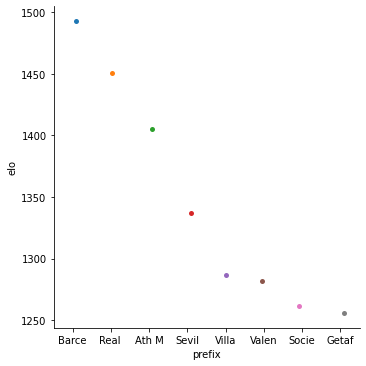

In [10]:
topteams2=teamstable.head(8)
k=[]
for i in topteams2['Team']:
    k.append(i[0:5])
topteams2["prefix"] = k
sns.catplot( x="prefix",y="elo",data=topteams2)
plt.show()

In [11]:
players=pd.read_csv('player_scraper/playerdata.csv',low_memory=False)

In [12]:
players.head()

,name,goals_per90,assists_per90,goals_assists_pens_per90,goals_pens_per90,goals,shots_total_per90,shots_on_target_per90,shots_free_kicks,pens_made,...,dribbles_vs,pressures,pressure_regains,blocks,blocked_shots,dribbles_completed,carry_distance,fouls,aerials_won,ball_recoveries
0,Andriy Lunin,"['0.00', None, None]","['0.00', None, None]","['0.00', None, None]","['0.00', None, None]",NaN,NaN,NaN,NaN,NaN,...,"[None, '0', None]","[None, '0', None]","[None, '0', None]","[None, '1', None]","[None, '0', None]","[None, '0', None]","[None, '249', None]","0,0,1","[None, '0', None]","[None, '21', None]"
1,Víctor Chust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thibaut Courtois,"0.00,0.00,0.00","0.00,0.00,0.00","0.00,0.00,0.00","0.00,0.00,0.00","0,0,0","0.04,0.03,0.00","0.00,0.03,0.00","0,0,0","0,0,0",...,"3,2,0","3,1,1","0,0,0","0,0,0","0,0,0","1,0,0","2317,3238,564","0,0,0","0,1,0","118,161,13"
3,Diego Altube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alfonso Espino,"0.00,0.03,0.00","0.21,0.06,0.00","0.21,0.09,0.00","0.00,0.03,0.00","0,1,0","[None, '0.49', '0.40']","[None, '0.09', '0.00']","[None, None, '0']","0,0,0",...,"[None, None, '15']","[None, None, '87']","[None, None, '23']","[None, None, '15']","[None, None, '0']","[None, None, '3']","[None, None, '470']","[None, '58', '6']","[None, None, '3']","[None, None, '45']"


In [13]:
# We will compute three seasons average of all stats
def calcaverage(listt):
    if(pd.isna(listt)):
        return
    else:
        listt=listt.strip('][').split(',')
        cc=0
        val=0
        for x in listt:
            x=x.strip('\' ')
            
            if(x!="None"):
                cc+=1
                val=val+float(x)
        if(cc==0):
            return
        return (val/cc)
for c in players.columns:
    if(c=="name"):
        continue
    players[c]=players[c].apply(calcaverage)
    
#     players[c]=scipy.stats.norm.sf(abs(scipy.stats.zscore((players[c].to_numpy()),nan_policy='omit')))*200
    




In [14]:
currentcol=""
playerscores=pd.DataFrame()
def calcscore(x):
    return scipy.stats.percentileofscore(players[c].to_numpy(), x , kind='rank')
for c in players.columns:
    if(c=="name"):
        playerscores[c]=players[c]
        continue
    playerscores[c]=players[c].apply(calcscore)
#     players[c]=scipy.stats.norm.sf(abs(scipy.stats.zscore((players[c].to_numpy()),nan_policy='omit')))*200
    




In [15]:


temp=playerscores.sort_values(by="goals_assists_pens_per90",ascending=False)
temp.head()
# temp[temp['goals']>10]

,name,goals_per90,assists_per90,goals_assists_pens_per90,goals_pens_per90,goals,shots_total_per90,shots_on_target_per90,shots_free_kicks,pens_made,...,dribbles_vs,pressures,pressure_regains,blocks,blocked_shots,dribbles_completed,carry_distance,fouls,aerials_won,ball_recoveries
160,Antonio Cortés,91.187739,15.900383,91.187739,91.187739,58.716475,73.563218,79.693487,28.544061,33.141762,...,14.080460,25.478927,25.383142,18.869732,13.122605,38.218391,18.007663,45.114943,31.034483,15.134100
163,Roberto López,88.505747,90.996169,90.996169,88.697318,33.812261,51.915709,60.919540,65.038314,33.141762,...,10.919540,13.601533,14.176245,15.038314,13.122605,17.528736,8.045977,7.375479,25.670498,12.260536
274,Denis Cheryshev,55.842912,91.187739,90.804598,57.279693,42.911877,48.850575,50.191571,28.544061,33.141762,...,67.528736,71.647510,67.528736,66.858238,50.862069,63.122605,56.321839,72.126437,54.406130,48.084291
296,Luis Suárez,90.613027,89.463602,90.613027,90.613027,79.885057,79.310345,79.310345,73.754789,76.724138,...,37.068966,65.325670,63.984674,47.892720,46.647510,81.896552,64.559387,55.076628,32.758621,43.295019
275,Ansu Fati,90.804598,50.478927,90.421456,90.804598,72.796935,73.180077,77.969349,28.544061,33.141762,...,40.900383,49.042146,50.287356,43.582375,31.800766,70.785441,63.601533,37.835249,28.639847,28.065134


In [16]:

def givescorehelper(features,weightage):
    val=0
    cc=0
    for i in range(0, len(features)):
        if(pd.isna(features[i])):
            continue
        val+=features[i]*weightage[i]
        cc+=weightage[i]
    if(cc==0):
        return
    return val/cc


finalscores=pd.DataFrame()
finalscores['name']=players['name']
finalscores
maxscore=-1
def roundoff(x):
    if(pd.isna(x)):
        return
    global maxscore
    fact=100/maxscore
    return round(x*fact)
def  givescore(stylename , featurenames ,weightage):
    global maxscore
    maxscore=-1
    for i,row in playerscores.iterrows():
        name=row['name']
        features=[]
        for x in featurenames:
            features.append(playerscores.loc[i,x])
        
        score=givescorehelper(features,weightage)
        if(score==None):
            continue
        maxscore=max(maxscore,score)
        finalscores.loc[i,stylename]=score
    finalscores[stylename]=finalscores[stylename].apply(roundoff)
        
    
# this is where we give scores
givescore('striker',['goals_pens_per90','shots_on_target_per90','aerials_won','shots_free_kicks'],[2,1,0.1,1])  
givescore('midfielder',['assists_per90','goals_per90','carry_distance','passes_completed','tackles_won','pressure_regains','dribbles_completed'],[2,0.3,0.2,0.5,0.5,0.5,0.5])
givescore('defender',['tackles_won','pressures','pressure_regains','blocks','blocked_shots','fouls','aerials_won','ball_recoveries','passes_completed_medium' ,'passes_completed_long','carry_distance' ],[3,0.5,1,0.5,3,0.5,0.5,2,2,1,1])

In [20]:
finalscores.sort_values(by="midfielder",ascending=False).head()

,name,striker,midfielder,defender
149,Nabil Fekir,89.0,100.0,81.0
114,José Campaña,69.0,99.0,96.0
143,Sergio Canales,85.0,99.0,85.0
419,Joan Jordán,71.0,99.0,94.0
181,Mikel Merino,82.0,98.0,95.0


In [21]:
finalscores.sort_values(by="striker",ascending=False).head()

,name,striker,midfielder,defender
288,Lionel Messi,100.0,96.0,63.0
296,Luis Suárez,99.0,90.0,57.0
324,Maxi Gómez,98.0,69.0,58.0
232,Darwin Machís,97.0,86.0,60.0
413,Iago Aspas,97.0,88.0,72.0


In [22]:
finalscores.sort_values(by="defender",ascending=False).head()

,name,striker,midfielder,defender
190,Marc Bartra,62.0,68.0,100.0
439,Casemiro,70.0,75.0,100.0
300,Saúl Ñíguez,73.0,71.0,99.0
213,Daniel Parejo,70.0,93.0,99.0
282,Sergio Busquets,36.0,75.0,98.0


# Home and Away Goals In Every Season 

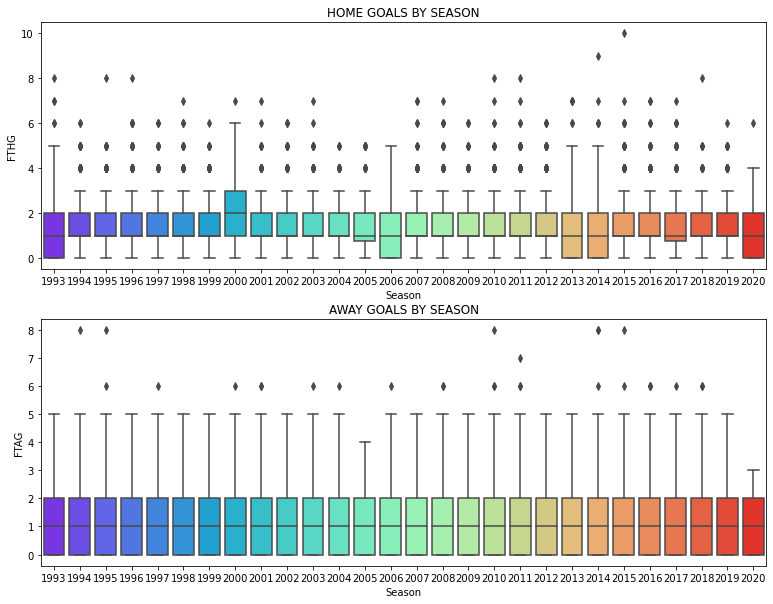

In [18]:
plt.figure(figsize=(13,10))
plt.subplot(211)
sns.boxplot(x = matches["Season"],y = matches["FTHG"],palette="rainbow")
plt.title("HOME GOALS BY SEASON")
plt.subplot(212)
sns.boxplot(x = matches["Season"],y = matches["FTAG"],palette="rainbow")
plt.title("AWAY GOALS BY SEASON")
plt.show()

# Home Wins vs Away Wins vs Draw

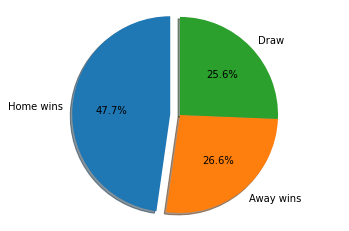

In [25]:
hometeam=0
awayteam=0
draw=0
    

df1 = pd.DataFrame(matches, columns=['FTHG'])
df2 = pd.DataFrame(matches, columns=['FTAG'])

a1=[]
a2=[]
for i in df1['FTHG']:
    a1.append(i)
for i in df2['FTAG']:
    a2.append(i)   

for i in range(len(a1)):
    if a1[i] > a2[i]:
        hometeam+=1
    elif a2[i] > a1[i]:
        awayteam+=1
    elif a1[i] == a2[i]:
        draw+=1
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Home wins', 'Away wins', 'Draw'
sizes = [hometeam,awayteam,draw]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
    
    
    
    

# Word cloud to visualise top teams in the league

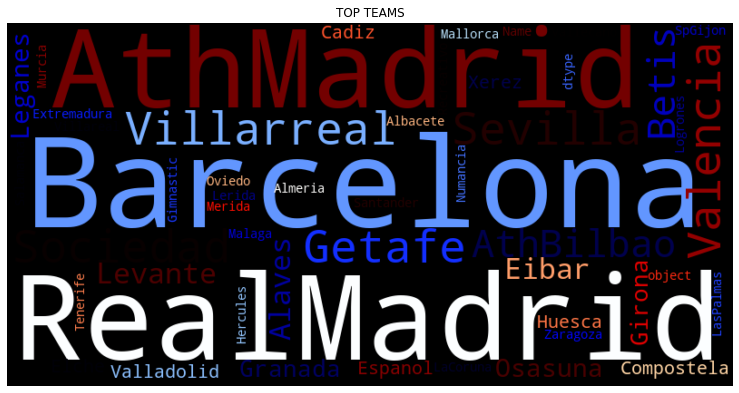

In [79]:
from wordcloud import WordCloud
import nltk
wrd2=[]
wrd= list(teamstable['Team'])

for i in wrd:
    if(type(i) == str):
        i=i.replace(" ","")
        #print(i)
        wrd2.append(i)
    else:
        break
wrd2 = pd.DataFrame(wrd2)
wc = WordCloud(background_color="black",scale =2,colormap="flag").generate(str(wrd2[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("TOP TEAMS")
plt.show()

# COUNT OF MATCHES PLAYED BETWEEN TOP 20 TEAMS

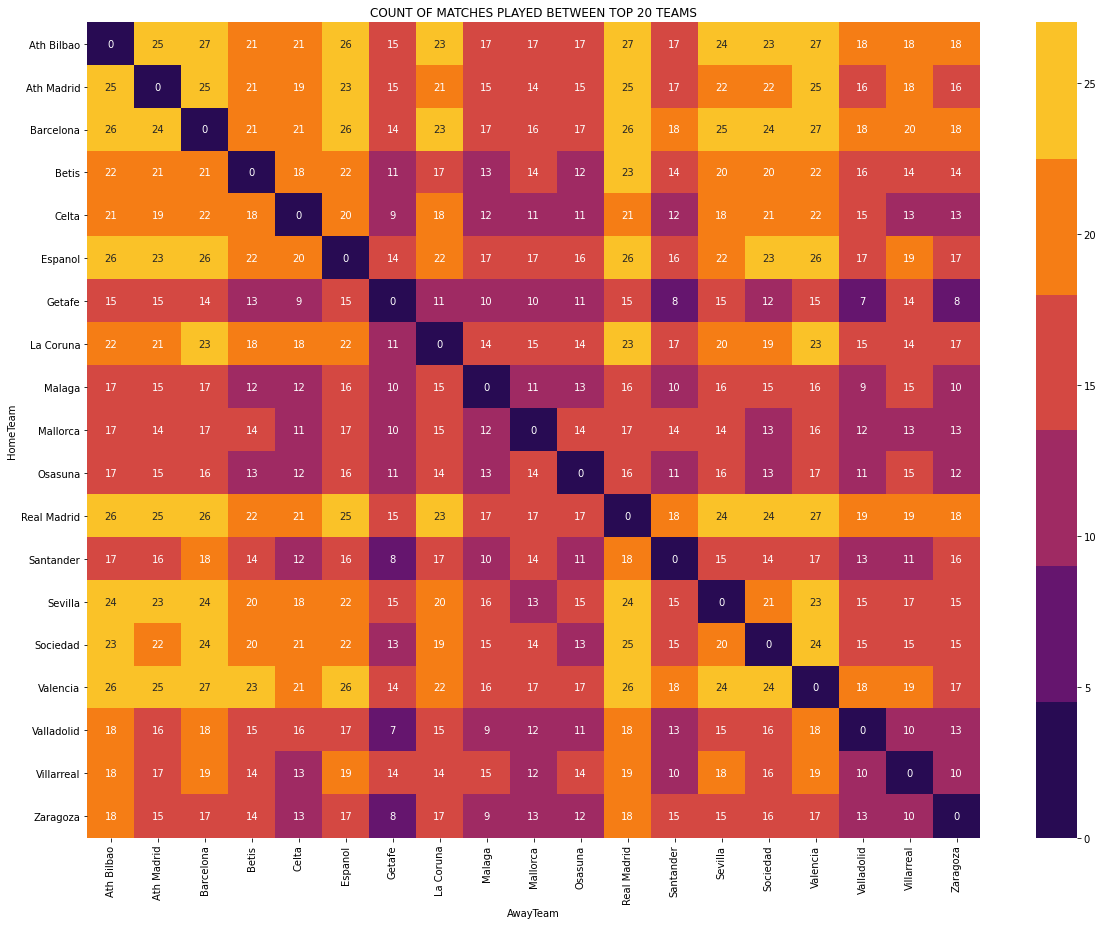

In [78]:
def label(matches):
    if matches["FTR"] == "H":
        return matches["HomeTeam"]
    elif matches["FTR"] == "A" :
        return matches["AwayTeam"]
    elif matches["FTR"] == "D":
        return "DRAW"

matches["win"] = matches.apply(lambda matches:label(matches),axis=1)
matches["win"]
    
i = matches["win"].value_counts()[1:20].index
i

    
c = matches[(matches["HomeTeam"].isin(i)) & (matches["AwayTeam"].isin(i))]
c 
    
d = pd.crosstab(c["HomeTeam"],c["AwayTeam"])
d  
    
plt.figure(figsize=(20,15))
sns.heatmap(d,annot=True,cmap=sns.color_palette("inferno"))
plt.title("COUNT OF MATCHES PLAYED BETWEEN TOP 20 TEAMS")
plt.show()


## Shots vs Goals

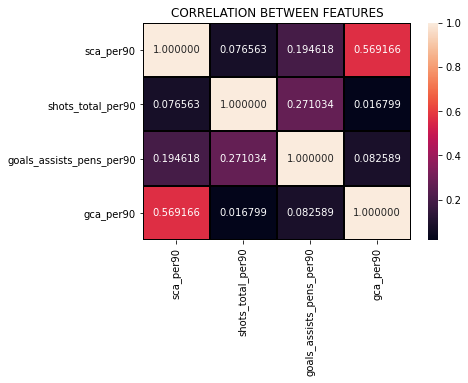

In [19]:
correlation = players[['sca_per90','shots_total_per90','goals_assists_pens_per90','gca_per90']].corr()
sns.heatmap(correlation,annot=True,fmt="f",linecolor="k",linewidths=1)
plt.title("CORRELATION BETWEEN FEATURES")
plt.show()

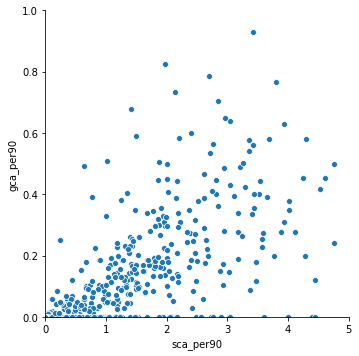

In [20]:
bx = sns.relplot(data=players, x="sca_per90", y="gca_per90")
xlim = bx.set(xlim=(0,5))
ylim = bx.set(ylim=(0,1))

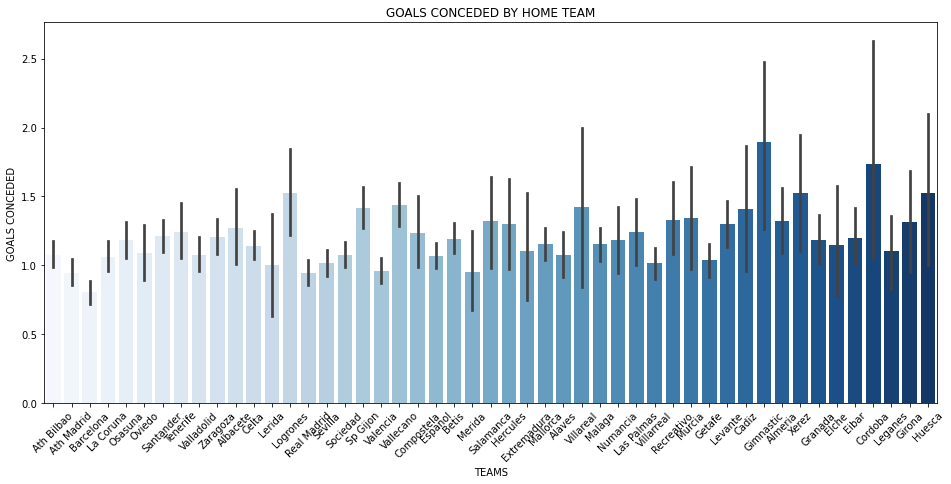

In [21]:
plt.figure(figsize=(16,7))
sns.barplot(x = matches["HomeTeam"],
            y = matches["FTAG"],
            palette = "Blues").set(xlabel='TEAMS', ylabel='GOALS CONCEDED')
plt.xticks(rotation=45)
plt.title("GOALS CONCEDED BY HOME TEAM")
# Show the plot
plt.show()

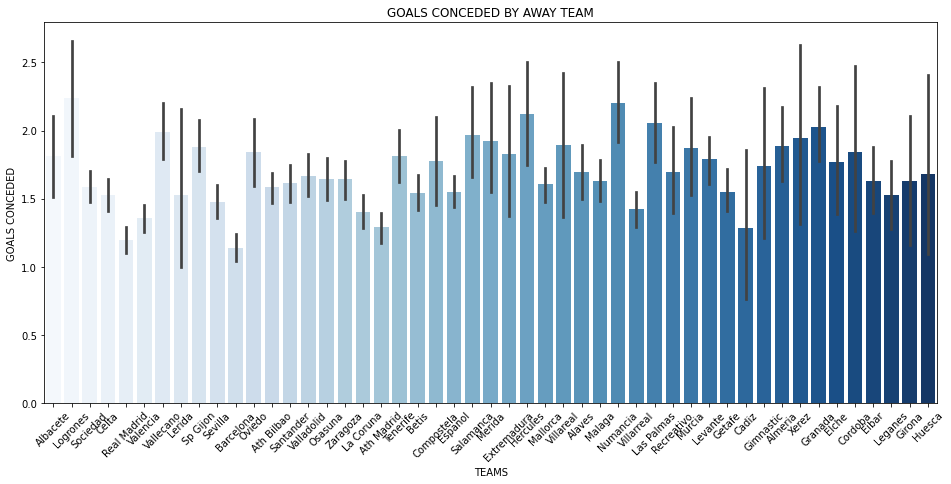

In [22]:
plt.figure(figsize=(16,7))
sns.barplot(x = matches["AwayTeam"],
            y = matches["FTHG"],
            palette = "Blues").set(xlabel='TEAMS', ylabel='GOALS CONCEDED')
plt.title("GOALS CONCEDED BY AWAY TEAM")
plt.xticks(rotation=45)
# Show the plot
plt.show()

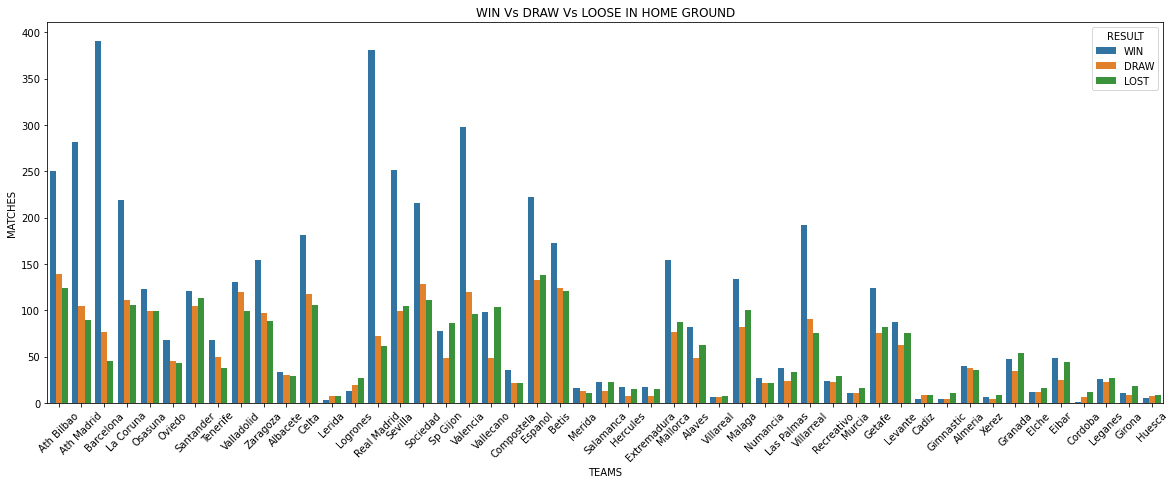

In [23]:
plt.figure(figsize=(20,7))
sns.countplot(x = matches["HomeTeam"],
            hue = matches['FTR']).set(xlabel='TEAMS', ylabel='MATCHES')
plt.title("WIN Vs DRAW Vs LOOSE IN HOME GROUND")
plt.legend(title='RESULT', labels=['WIN', 'DRAW', 'LOST'])
plt.xticks(rotation=45)
# Show the plot
plt.show()

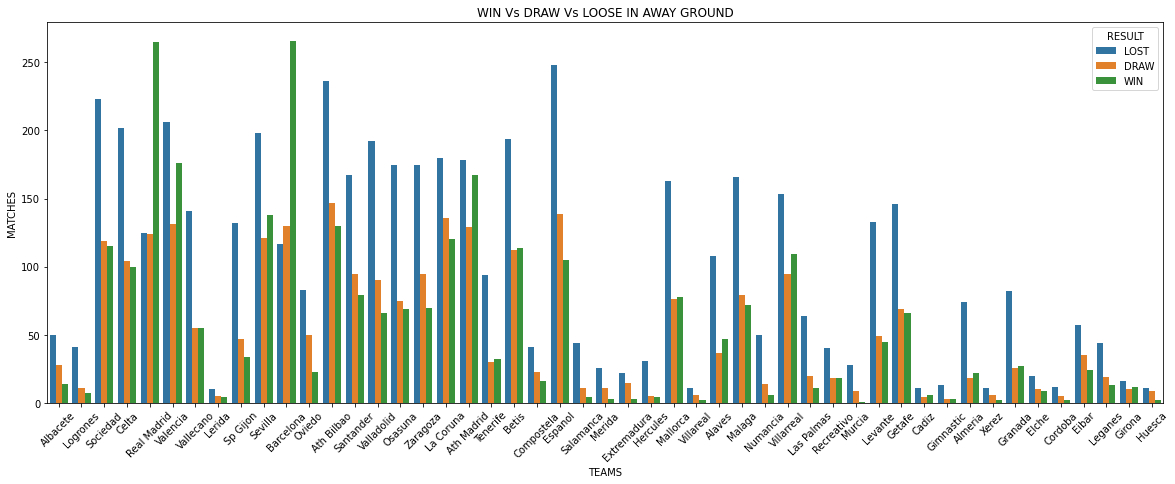

In [24]:
plt.figure(figsize=(20,7))
sns.countplot(x = matches["AwayTeam"],
            hue = matches['FTR']).set(xlabel='TEAMS', ylabel='MATCHES')
plt.title("WIN Vs DRAW Vs LOOSE IN AWAY GROUND")
plt.legend(title='RESULT', labels=['LOST', 'DRAW', 'WIN'])
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [79]:
matches.describe()

,Unnamed: 0,FTHG,FTAG,Season,HTHG,HTAG,GBH,GBD,GBA,IWH,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,11051.000000,10355.000000,10355.000000,11051.000000,9593.000000,9593.000000,4729.000000,4729.000000,4729.000000,7509.000000,...,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,208.964890,1.568904,1.109512,2005.249842,0.693214,0.483061,2.355394,3.598336,4.379975,2.438172,...,1.863664,-0.316194,1.955792,1.958629,1.959669,1.962530,2.018463,2.018936,1.937470,1.940449
std,129.742154,1.318418,1.117745,8.097132,0.843592,0.696223,1.424818,0.942945,3.087454,1.665292,...,0.455824,0.740895,0.102628,0.104099,0.103082,0.103994,0.104796,0.109858,0.097723,0.097881
min,0.000000,0.000000,0.000000,1993.000000,0.000000,0.000000,1.050000,2.350000,1.120000,1.030000,...,1.290000,-2.750000,1.680000,1.670000,1.700000,1.750000,1.780000,1.800000,1.710000,1.750000
25%,100.000000,1.000000,0.000000,1998.000000,0.000000,0.000000,1.700000,3.200000,2.750000,1.650000,...,1.550000,-0.750000,1.880000,1.880000,1.880000,1.880000,1.940000,1.930000,1.860000,1.860000
50%,203.000000,1.000000,1.000000,2005.000000,0.000000,0.000000,2.050000,3.300000,3.500000,2.000000,...,1.740000,-0.250000,1.960000,1.970000,1.950000,1.970000,2.010000,2.020000,1.930000,1.940000
75%,306.000000,2.000000,2.000000,2012.000000,1.000000,1.000000,2.450000,3.500000,4.800000,2.500000,...,2.040000,0.000000,2.040000,2.040000,2.040000,2.045000,2.100000,2.105000,2.015000,2.020000
max,551.000000,10.000000,8.000000,2020.000000,6.000000,6.000000,17.000000,11.000000,34.000000,20.000000,...,4.130000,1.750000,2.160000,2.190000,2.200000,2.290000,2.260000,2.300000,2.150000,2.210000


In [23]:

def getform(ht, at, i):
    global matches
    htdatalast20 = {'wins': 0, 'goaldiff': 0}
    atdatalast20 = {'wins': 0, 'goaldiff': 0}
    htfound = 0
    atfound = 0
    versusdatalast5 = {'wins': 0, 'goaldiff': 0}
    versusfound = 0
    kk = i-1
    dictt={}
    for j in range(kk, 0, -1):
        cht = matches.loc[j, 'HomeTeam']
        cat = matches.loc[j, 'AwayTeam']
        if(htfound < 20):
            if(cht == ht):
                htfound += 1
                htdatalast20['goaldiff'] += matches.loc[j,
                    'FTHG'] - matches.loc[j, 'FTAG']
#                 htdatalast20['shotsontarget']+=matches.loc[j,
                if(matches.at[j, 'FTR'] == 'D'):
                    htdatalast20['wins'] += 0.5
                elif(matches.at[j, 'FTR'] == 'H'):
                    htdatalast20['wins'] += 1
                else:
                        None
            if(cat == ht):
                htfound += 1
                htdatalast20['goaldiff'] -= (matches.loc[j,
                                                'FTHG'] - matches.loc[j, 'FTAG'])
                if(matches.at[j, 'FTR'] == 'D'):
                    htdatalast20['wins'] += 0.5
                elif(matches.at[j, 'FTR'] == 'H'):
                    htdatalast20['wins'] -= 1
                else:
                        None
        if(atfound < 20):
            if(cht == at):
                atfound += 1
                atdatalast20['goaldiff'] += (matches.loc[j,
                                                'FTHG'] - matches.loc[j, 'FTAG'])
                if(matches.at[j, 'FTR'] == 'D'):
                    atdatalast20['wins'] += 0.5
                elif(matches.at[j, 'FTR'] == 'H'):
                    atdatalast20['wins'] += 1
                else:
                        None
            if(cat == at):
                atfound += 1
                atdatalast20['goaldiff'] -= (matches.loc[j,
                                                'FTHG'] - matches.loc[j, 'FTAG'])
                if(matches.at[j, 'FTR'] == 'D'):
                    atdatalast20['wins'] += 0.5
                elif(matches.at[j, 'FTR'] == 'H'):
                    atdatalast20['wins'] -= 1
                else:
                        None
        if(versusfound < 5):
            if((cht == ht and cat == at) or (cht == at and cat == ht)):
                versusfound += 1
                if(cht == ht):
                    versusdatalast5['goaldiff'] += matches.loc[j,
                        'FTHG'] - matches.loc[j, 'FTAG']
                    if(matches.at[j, 'FTR'] == 'D'):
                        versusdatalast5['wins'] += 0.5
                    elif(matches.at[j, 'FTR'] == 'H'):
                        versusdatalast5['wins'] += 1
                    else:
                        None
                else:
                    versusdatalast5['goaldiff'] -= (
                        matches.loc[j, 'FTHG'] - matches.loc[j, 'FTAG'])
                    if(matches.at[j, 'FTR'] == 'D'):
                        versusdatalast5['wins'] += 0
                    elif(matches.at[j, 'FTR'] == 'H'):
                        versusdatalast5['wins'] -= 1
                    else:
                        None
        if (htfound==5):
            dictt['htgdlast5']=htdatalast20['goaldiff']
            dictt['htwinslat5']=htdatalast20['wins']
        if (atfound==5):
            dictt['atgdlast5']=atdatalast20['goaldiff']
            dictt['atwinslat5']=atdatalast20['wins']
        if (htfound==10):
            dictt['htgdlast10']=htdatalast20['goaldiff']
            dictt['htwinslat10']=htdatalast20['wins']
        if (atfound==10):
            dictt['atgdlast10']=atdatalast20['goaldiff']
            dictt['atwinslat10']=atdatalast20['wins']
        if(versusfound == 5 and htfound == 20 and atfound == 20):
            break

    if(versusfound==5 and htfound==20 and atfound==20):
        dictt.update({'ht':ht,'at':at,'htwinslast20':htdatalast20['wins'],'atwinslast20':atdatalast20['wins'],\
                'htgdlast20':htdatalast20['goaldiff'],'atgdlast20':atdatalast20['goaldiff'],\
                'versuslast5':versusdatalast5['wins']\
                })
        return dictt

In [24]:
modeldata=pd.DataFrame()
for i , row in matches.iterrows():
    if(i > 1000):
            dictt=getform(matches.at[i,'HomeTeam'],matches.at[i,'AwayTeam'],i)
            if(dictt!=None):
                dictt['result']=matches.at[i,'FTR']
                modeldata=modeldata.append(dictt,ignore_index=True)
    if(i%1000==0):
        print(i)
modeldata.to_csv('modeldata.csv' , index=False)

0
1000
2000
3000
4000
5000
6000
7000


In [25]:
i

7530

In [26]:
modeldata=pd.read_csv('modeldata.csv')
modeldata.head()

,at,atgdlast10,atgdlast20,atgdlast5,atwinslast20,atwinslat10,atwinslat5,ht,htgdlast10,htgdlast20,htgdlast5,htwinslast20,htwinslat10,htwinslat5,result,versuslast5
0,Villarreal,-2.0,-2.0,-1.0,4.5,0.5,1.0,La Coruna,11.0,11.0,10.0,5.0,1.5,1.5,H,-0.5
1,Ath Bilbao,5.0,2.0,4.0,4.5,3.5,3.0,Malaga,0.0,-3.0,0.0,2.0,1.0,-1.5,H,0.0
2,Alaves,-10.0,-15.0,-11.0,1.0,0.5,-0.5,Sociedad,-1.0,5.0,-5.0,6.5,0.5,-1.5,H,-0.5
3,Celta,3.0,2.0,4.0,2.0,2.0,2.0,Vallecano,-9.0,-13.0,-6.0,-2.5,-1.5,-0.5,H,2.0
4,Vallecano,-7.0,-12.0,-5.0,-2.0,-0.5,0.0,La Coruna,11.0,14.0,9.0,6.0,2.5,2.5,H,0.0


In [27]:
modeldata.describe()

,atgdlast10,atgdlast20,atgdlast5,atwinslast20,atwinslat10,atwinslat5,htgdlast10,htgdlast20,htgdlast5,htwinslast20,htwinslat10,htwinslat5,versuslast5
count,4856.000000,4856.000000,4856.000000,4856.000000,4856.000000,4856.000000,4856.000000,4856.000000,4856.000000,4856.000000,4856.000000,4856.000000,4856.000000
mean,0.954283,1.772446,0.647858,3.015651,1.636738,0.983834,0.603377,1.476112,0.145387,2.687397,1.211491,0.446458,0.023785
std,8.353935,14.888141,4.969730,3.437849,2.110574,1.378105,8.350560,14.827628,4.932153,3.425941,2.146239,1.410427,1.353373
min,-23.000000,-38.000000,-18.000000,-7.500000,-4.500000,-3.000000,-22.000000,-41.000000,-15.000000,-7.000000,-5.500000,-4.000000,-4.000000
25%,-5.000000,-8.000000,-3.000000,0.500000,0.000000,0.000000,-5.000000,-8.000000,-3.000000,0.500000,-0.500000,-0.500000,-1.000000
50%,0.000000,-1.000000,0.000000,3.000000,1.500000,1.000000,-1.000000,-1.000000,0.000000,2.500000,1.000000,0.500000,0.000000
75%,5.000000,8.000000,3.000000,5.500000,3.000000,2.000000,5.000000,8.000000,3.000000,5.000000,3.000000,1.500000,1.000000
max,37.000000,59.000000,23.000000,12.000000,7.500000,4.500000,39.000000,59.000000,25.000000,13.000000,7.500000,4.000000,3.000000


# Models

In [28]:
df = pd.read_csv("modeldata.csv")
df.columns

Index(['at', 'atgdlast10', 'atgdlast20', 'atgdlast5', 'atwinslast20',
       'atwinslat10', 'atwinslat5', 'ht', 'htgdlast10', 'htgdlast20',
       'htgdlast5', 'htwinslast20', 'htwinslat10', 'htwinslat5', 'result',
       'versuslast5'],
      dtype='object')

In [29]:
xfeatures=['atgdlast10', 'atgdlast20', 'atgdlast5', 'atwinslast20',
       'atwinslat10', 'atwinslat5', 'htgdlast10', 'htgdlast20',
       'htgdlast5', 'htwinslast20', 'htwinslat10', 'htwinslat5',
       'versuslast5']

In [30]:
X = df[xfeatures]
Y = df['result']

In [37]:
X.head()
X=(X-X.mean())/X.std()
X.head()

,atgdlast10,atgdlast20,atgdlast5,atwinslast20,atwinslat10,atwinslat5,htgdlast10,htgdlast20,htgdlast5,htwinslast20,htwinslat10,htwinslat5,versuslast5
0,-0.353640,-0.253386,-0.331579,0.431767,-0.538592,0.011730,1.245021,0.642307,1.998035,0.675027,0.134425,0.746966,-0.387022
1,0.484289,0.015284,0.674512,0.431767,0.882822,1.462999,-0.072256,-0.301876,-0.029477,-0.200645,-0.098540,-1.380048,-0.017575
2,-1.311272,-1.126564,-2.343761,-0.586312,-0.538592,-1.076721,-0.192008,0.237657,-1.043234,1.112863,-0.331506,-1.380048,-0.387022
3,0.244881,0.015284,0.674512,-0.295432,0.172115,0.737365,-1.150028,-0.976293,-1.245985,-1.514153,-1.263368,-0.671043,1.460215
4,-0.952160,-0.925061,-1.136452,-1.458950,-1.012397,-0.713904,1.245021,0.844632,1.795284,0.966918,0.600357,1.455971,-0.017575


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [41]:
## Train classifier
def train_classifier(cls, X_train, y_train):
    cls.fit(X_train, y_train)
    
def predict_labels(cls, features, target):
    # Makes predictions using a fit classifier based on F1 score.
    y_pred = cls.predict(features)
    return cls.score(features, target) ,y_pred

def train_predict(cls, X_train, y_train, X_test, y_test):
    print("Training a {} using a training set size of {} ".format(cls.__class__.__name__, len(X_train)))

    # Train the classifier
    train_classifier(cls, X_train, y_train)

    # Print the results of prediction for both training and testing
    acc , predictions = predict_labels(cls, X_train, y_train)
    print("for training set")
    print("accuracy :", acc)
    print('')
    
    acc , predictions= predict_labels(cls, X_test, y_test)
    print("for test set")
    print("accuracy :", acc)
    return predictions ,acc

## Plot confusion matrix
def plot_confusion(predictions ,y_test, score):
    cm = metrics.confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'OrRd');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 10);

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 

## Logistic Regression

Training a LogisticRegression using a training set size of 3399 
for training set
accuracy : 0.5180935569285083

for test set
accuracy : 0.5209334248455731


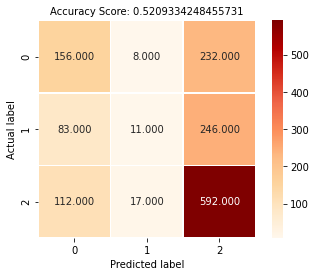

In [43]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred ,acc = train_predict(lr,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test ,acc)

## Decision Tree Classifier

Training a DecisionTreeClassifier using a training set size of 3399 
for training set
accuracy : 0.511326860841424

for test set
accuracy : 0.5223061084420041


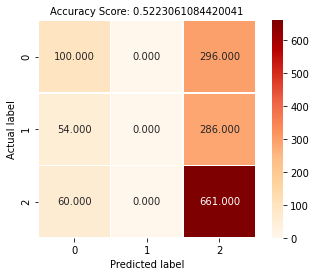

In [44]:
dtree_model = DecisionTreeClassifier(max_depth = 2)
pred ,acc= train_predict(dtree_model,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)

## K-Neighbors Classifier

Training a KNeighborsClassifier using a training set size of 3399 
for training set
accuracy : 0.6016475433951162

for test set
accuracy : 0.43719972546328073


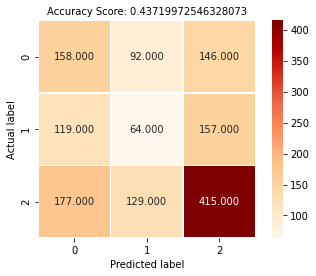

In [45]:
knn = KNeighborsClassifier(n_neighbors = 7)
pred ,acc= train_predict(knn,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)

## XGBOOST MODEL

[18:26:16] WARNING: ../src/learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:26:16] WARNING: ../src/learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:26:16] WARNING: ../src/learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above c

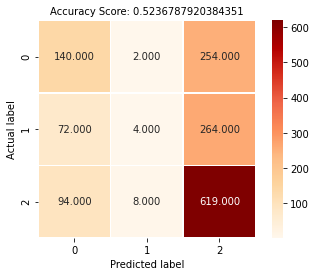

In [46]:
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,f1_score,accuracy_score


parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

clf = xgb.XGBClassifier(seed=82)

scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf,
                        scoring=scorer,
                        param_grid=parameters,
                        cv=10)
grid_obj = grid_obj.fit(x_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
pred ,acc= train_predict(clf,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)

## TRYING TO JUST SEE IF HOME TEAM WINS OR NOT

In [47]:
for i,row in modeldata.iterrows():
    if(row.result=='H'):
        df.at[i,'HomeTeamWin']='Y'
    else:
        df.at[i,'HomeTeamWin']='N'
Y=df['HomeTeamWin']


**LOGISTIC REGRESSION

Training a LogisticRegression using a training set size of 3399 
for training set
accuracy : 0.6384230656075316

for test set
accuracy : 0.6259437199725463


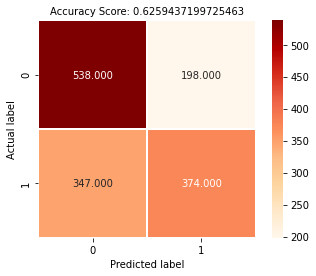

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
lrhome = LogisticRegression()
lrhome.fit(x_train, y_train)
pred ,acc = train_predict(lrhome,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test ,acc)

In [52]:
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,f1_score,accuracy_score


# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5],
               'num_class':1
             }  
xgbmodelhome = xgb.XGBClassifier(seed=82)
scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(clf,
                        scoring=scorer,
                        param_grid=parameters,
                        cv=10)
grid_obj = grid_obj.fit(x_train,y_train)
xgbmodelhome = grid_obj.best_estimator_
pred ,acc= train_predict(xgbmodelhome,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)

ValueError: Parameter grid for parameter (num_class) needs to be a list or numpy array, but got (<class 'int'>). Single values need to be wrapped in a list with one element.

Training a DecisionTreeClassifier using a training set size of 3399 
for training set
accuracy : 0.6160635481023831

for test set
accuracy : 0.5991763898421414


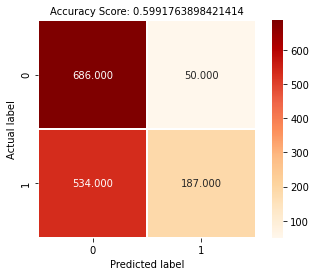

In [53]:
dtree_modelhome = DecisionTreeClassifier(max_depth = 2)
pred ,acc= train_predict(dtree_modelhome,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)

## TRYING TO JUST SEE IF AWAY TEAM WINS OR NOT

In [54]:
for i,row in modeldata.iterrows():
    if(row.result=='A'):
        df.at[i,'AwayTeamWin']='Y'
    else:
        df.at[i,'AwayTeamWin']='N'
Y=df['AwayTeamWin']

Training a LogisticRegression using a training set size of 3399 
for training set
accuracy : 0.732568402471315

for test set
accuracy : 0.7316403568977351


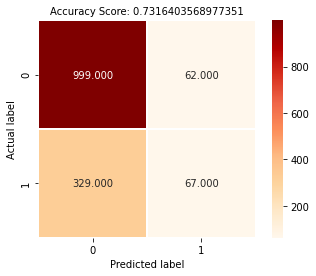

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
lraway = LogisticRegression()
lraway.fit(x_train, y_train)
pred ,acc = train_predict(lraway,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test ,acc)

In [56]:
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,f1_score,accuracy_score


# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  
xgbmodelaway = xgb.XGBClassifier(seed=82)
scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(clf,
                        scoring=scorer,
                        param_grid=parameters,
                        cv=10)
grid_obj = grid_obj.fit(x_train,y_train)
xgbmodelaway = grid_obj.best_estimator_
pred ,acc= train_predict(xgbmodelaway,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)

/home/gagan/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gagan/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gagan/.local/lib/python3.6/site-packages/xgboost/sklearn.py", line 834, in fit
    callbacks=callbacks)
  File "/home/gagan/.local/lib/python3.6/site-packages/xgboost/training.py", line 212, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/home/gagan/.local/lib/python3.6/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/home/gagan/.local/lib/python3.6/site-packages/xgboost/core.py", line 1161, in update
    dtrain.handle))
  File "/home/gagan/.local/lib/python3.6/site-packages/xgboo

XGBoostError: value 0 for Parameter num_class should be greater equal to 1
num_class: Number of output class in the multi-class classification.